In [1]:
!pip install -q pandas matplotlib

In [2]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

dfs = {}

for filename, filedata in uploaded.items():
    dfs[filename] = pd.read_csv(io.BytesIO(filedata))

df_llama_lora = dfs.get("llama3-lora-671_result.csv")
df_llama_base = dfs.get("Meta-Llama-3.1-8B-Instruct_result.csv")

Saving Meta-Llama-3.1-8B-Instruct_result.csv to Meta-Llama-3.1-8B-Instruct_result.csv
Saving llama3-lora-671_result.csv to llama3-lora-671_result.csv


In [3]:
df_llama_base.shape

(900, 15)

In [4]:
df_llama_lora.shape

(900, 15)

In [5]:
df_llama_lora.head()

,model,original_text,vader_original_sentiment,vader_original_score,roberta_original_sentiment,roberta_original_score,summarized_text,vader_summarized_sentiment,vader_summarized_score,roberta_summarized_sentiment,roberta_summarized_score,mode_used,precision,recall,f1
0,ttran293/llama3-lora-671,Last year 's net sales rose to EUR 68.3 millio...,neutral,0.0,POSITIVE,0.997993,The company's last year's net sales increased ...,positive,0.2732,POSITIVE,0.998011,neutral,0.957686,0.949278,0.953464
1,ttran293/llama3-lora-671,Revenue in July to September grew 14 percent t...,neutral,0.0,POSITIVE,0.998568,The company's revenue for July to September in...,positive,0.2732,POSITIVE,0.998570,neutral,0.931704,0.891094,0.910947
2,ttran293/llama3-lora-671,"The new company , DiaPol S.r.l. , would manufa...",neutral,0.0,POSITIVE,0.993061,"DiaPol S.r.l., a new company, will produce too...",neutral,0.0000,POSITIVE,0.993607,neutral,0.947000,0.937411,0.942181
3,ttran293/llama3-lora-671,The second variant offers complete final finis...,neutral,0.0,POSITIVE,0.998534,This option provides full interior design usin...,positive,0.3612,POSITIVE,0.998855,neutral,0.926257,0.897722,0.911766
4,ttran293/llama3-lora-671,The company has an annual turnover of EUR32 .8 m.,neutral,0.0,POSITIVE,0.992724,The company has an annual turnover of EUR32.8m.,neutral,0.0000,POSITIVE,0.991384,neutral,0.978507,0.954037,0.966117


In [6]:
df_llama_base.head()


,model,original_text,vader_original_sentiment,vader_original_score,roberta_original_sentiment,roberta_original_score,summarized_text,vader_summarized_sentiment,vader_summarized_score,roberta_summarized_sentiment,roberta_summarized_score,mode_used,precision,recall,f1
0,meta-llama/Meta-Llama-3.1-8B-Instruct,Last year 's net sales rose to EUR 68.3 millio...,neutral,0.0,POSITIVE,0.997993,Last year's net sales rose from EUR 62.2 milli...,neutral,0.0000,POSITIVE,0.998203,neutral,0.977488,0.955922,0.966585
1,meta-llama/Meta-Llama-3.1-8B-Instruct,Revenue in July to September grew 14 percent t...,neutral,0.0,POSITIVE,0.998568,The company reported revenue growth of 14% fro...,positive,0.5267,POSITIVE,0.998679,neutral,0.930923,0.873614,0.901359
2,meta-llama/Meta-Llama-3.1-8B-Instruct,"The new company , DiaPol S.r.l. , would manufa...",neutral,0.0,POSITIVE,0.993061,"DiaPol S.r.l., a new company, will manufacture...",neutral,0.0000,POSITIVE,0.991542,neutral,0.951427,0.943363,0.947378
3,meta-llama/Meta-Llama-3.1-8B-Instruct,The second variant offers complete final finis...,neutral,0.0,POSITIVE,0.998534,The second variant includes complete final fin...,neutral,0.0000,POSITIVE,0.998790,neutral,0.954373,0.926352,0.940153
4,meta-llama/Meta-Llama-3.1-8B-Instruct,The company has an annual turnover of EUR32 .8 m.,neutral,0.0,POSITIVE,0.992724,The company has an annual turnover of EUR32.8 ...,neutral,0.0000,POSITIVE,0.993352,neutral,0.977273,0.947951,0.962389


In [7]:
import matplotlib.pyplot as plt

print(df_llama_lora["f1"].describe(), "\n")
print(df_llama_base["f1"].describe(), "\n")

lora_mean = df_llama_lora["f1"].mean()
base_mean = df_llama_base["f1"].mean()

print(f"LoRA mean F1: {lora_mean:.4f}")
print(f"Base mean F1: {base_mean:.4f}")


count    900.000000
mean       0.880761
std        0.041710
min        0.791989
25%        0.848730
50%        0.868535
75%        0.912722
max        1.000000
Name: f1, dtype: float64 

count    900.000000
mean       0.883194
std        0.042549
min        0.791130
25%        0.849832
50%        0.871009
75%        0.914165
max        1.000000
Name: f1, dtype: float64 

LoRA mean F1: 0.8808
Base mean F1: 0.8832


In [8]:
segments = [
    (0, 300),
    (300, 600),
    (600, 900)
]

for start, end in segments:
    lora_seg = df_llama_lora.iloc[start:end]["f1"]
    base_seg = df_llama_base.iloc[start:end]["f1"]

    print(f"Segment {start}:{end}")
    print(f"  LoRA mean F1: {lora_seg.mean():.4f}")
    print(f"  Base mean F1: {base_seg.mean():.4f}")
    print()

Segment 0:300
  LoRA mean F1: 0.9265
  Base mean F1: 0.9294

Segment 300:600
  LoRA mean F1: 0.8533
  Base mean F1: 0.8564

Segment 600:900
  LoRA mean F1: 0.8625
  Base mean F1: 0.8638



In [10]:
segments = {
    "Financial": (0, 300),
    "IMDB": (300, 600),
    "Mental Health": (600, 900)
}


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

segments = {
    "Financial": (0, 300),
    "IMDB": (300, 600),
    "Mental Health": (600, 900),
    "Overall": (0, 900)
}

def sentiment_avg_table(df):
    rows = []
    for domain, (start, end) in segments.items():
        sub = df.iloc[start:end]
        rows.append([
            domain,
            sub["vader_original_score"].mean(),
            sub["vader_summarized_score"].mean(),
            sub["roberta_original_score"].mean(),
            sub["roberta_summarized_score"].mean(),
        ])
    return pd.DataFrame(
        rows,
        columns=[
            "Domain",
            "VADER_original_avg",
            "VADER_summary_avg",
            "RoBERTa_original_avg",
            "RoBERTa_summary_avg",
        ]
    )

lora_sent = sentiment_avg_table(df_llama_lora)
base_sent = sentiment_avg_table(df_llama_base)

print("LoRA sentiment averages:\n", lora_sent, "\n")
print("Base sentiment averages:\n", base_sent)


LoRA sentiment averages:
           Domain  VADER_original_avg  VADER_summary_avg  RoBERTa_original_avg  \
0      Financial            0.167837           0.169749              0.992705   
1           IMDB            0.346293           0.046232              0.998741   
2  Mental Health           -0.146414          -0.415144              0.989435   
3        Overall            0.122572          -0.066388              0.993627   

   RoBERTa_summary_avg  
0             0.987158  
1             0.997861  
2             0.989991  
3             0.991670   

Base sentiment averages:
           Domain  VADER_original_avg  VADER_summary_avg  RoBERTa_original_avg  \
0      Financial            0.167837           0.162428              0.992705   
1           IMDB            0.346293           0.050007              0.998741   
2  Mental Health           -0.146414          -0.416890              0.989435   
3        Overall            0.122572          -0.068152              0.993627   

   RoBERT

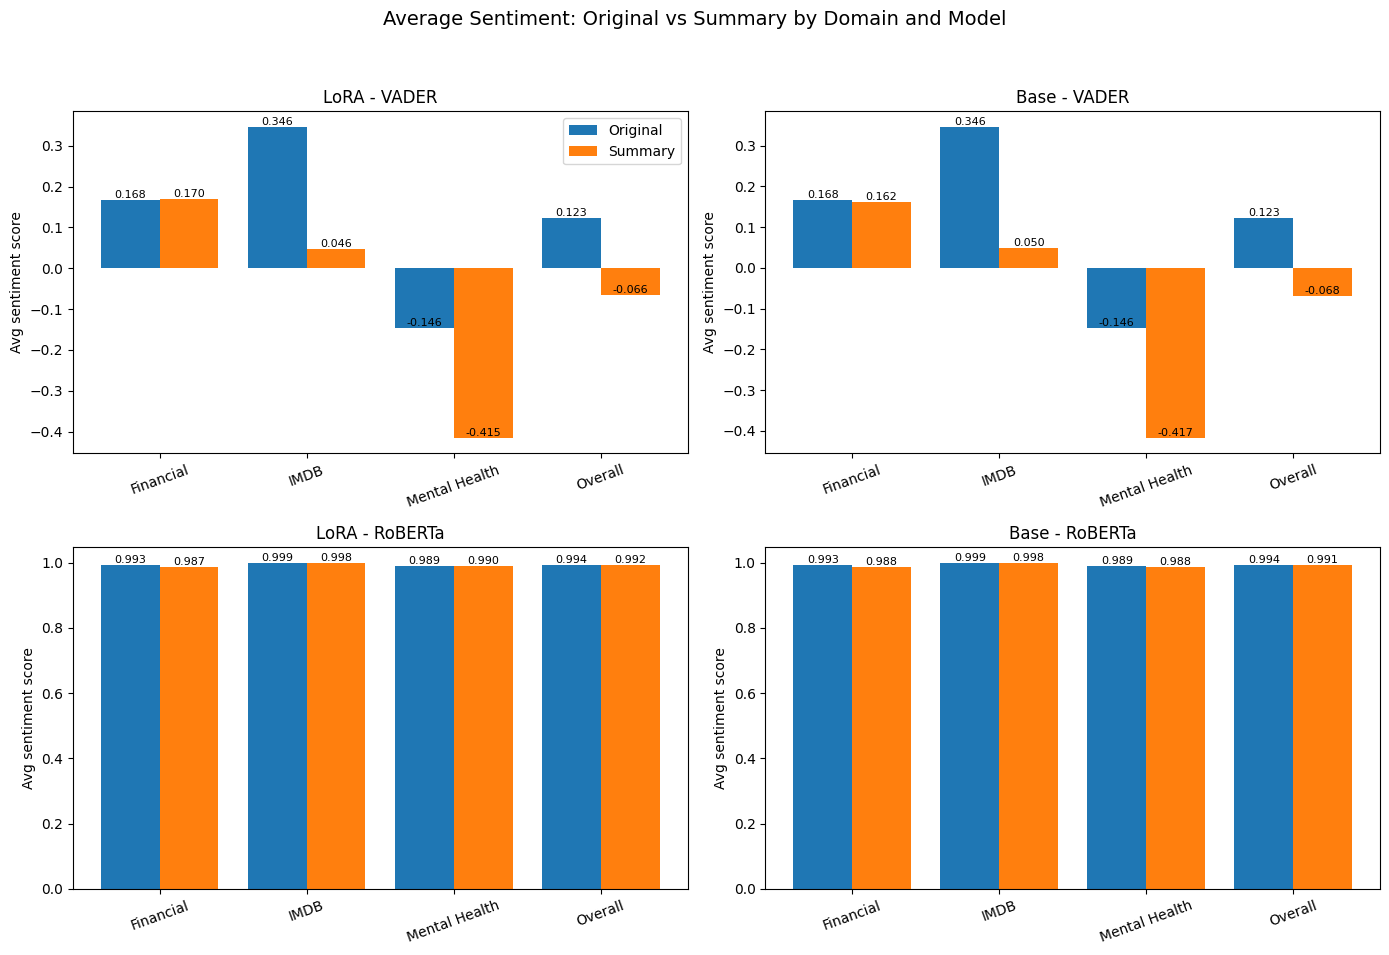

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

segments = {
    "Financial": (0, 300),
    "IMDB": (300, 600),
    "Mental Health": (600, 900),
    "Overall": (0, 900)
}

def sentiment_avg_table(df):
    rows = []
    for domain, (start, end) in segments.items():
        sub = df.iloc[start:end]
        rows.append([
            domain,
            sub["vader_original_score"].mean(),
            sub["vader_summarized_score"].mean(),
            sub["roberta_original_score"].mean(),
            sub["roberta_summarized_score"].mean(),
        ])
    return pd.DataFrame(
        rows,
        columns=[
            "Domain",
            "VADER_original_avg",
            "VADER_summary_avg",
            "RoBERTa_original_avg",
            "RoBERTa_summary_avg",
        ]
    )

lora_sent = sentiment_avg_table(df_llama_lora)
base_sent = sentiment_avg_table(df_llama_base)

def add_bar_labels(ax, bars, fmt="{:.3f}", fontsize=8):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            fmt.format(height),
            ha="center",
            va="bottom",
            fontsize=fontsize,
        )

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Average Sentiment: Original vs Summary by Domain and Model", fontsize=14)

models = [("LoRA", lora_sent), ("Base", base_sent)]
engines = [
    ("VADER", "VADER_original_avg", "VADER_summary_avg"),
    ("RoBERTa", "RoBERTa_original_avg", "RoBERTa_summary_avg"),
]

for col, (model_name, sent_df) in enumerate(models):
    x = range(len(sent_df))
    domains = sent_df["Domain"]

    for row, (engine_name, orig_col, sum_col) in enumerate(engines):
        ax = axes[row, col]

        bars_orig = ax.bar(
            [i - 0.2 for i in x],
            sent_df[orig_col],
            width=0.4,
            label="Original",
        )
        bars_sum = ax.bar(
            [i + 0.2 for i in x],
            sent_df[sum_col],
            width=0.4,
            label="Summary",
        )

        add_bar_labels(ax, bars_orig)
        add_bar_labels(ax, bars_sum)

        ax.set_xticks(list(x))
        ax.set_xticklabels(domains, rotation=20)
        ax.set_ylabel("Avg sentiment score")
        ax.set_title(f"{model_name} - {engine_name}")

        if row == 0 and col == 0:
            ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


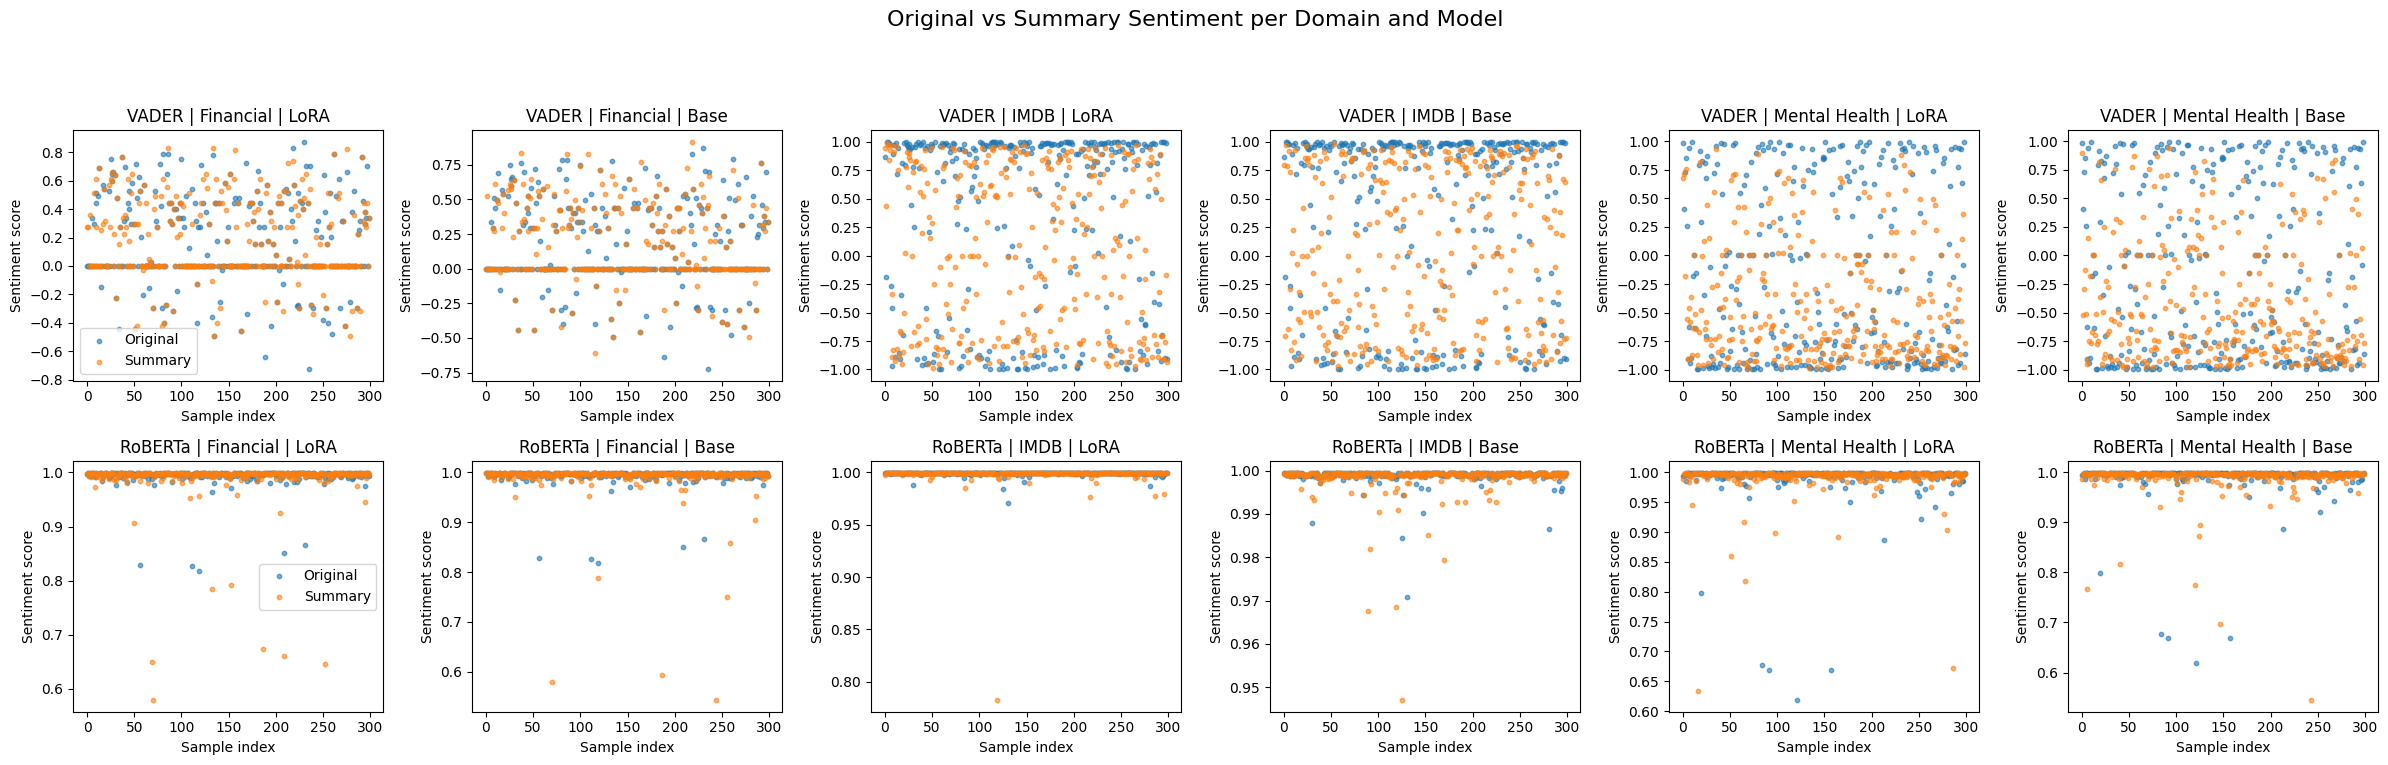

In [27]:
domains = [
    ("Financial", 0, 300),
    ("IMDB", 300, 600),
    ("Mental Health", 600, 900),
]

import matplotlib.pyplot as plt
import numpy as np

def plot_domain_model_engine(ax, df, start, end, engine_name, title):
    if engine_name == "VADER":
        orig_col = "vader_original_score"
        sum_col  = "vader_summarized_score"
    else:
        orig_col = "roberta_original_score"
        sum_col  = "roberta_summarized_score"

    sub = df.iloc[start:end]
    idx = np.arange(len(sub))

    ax.scatter(idx, sub[orig_col], s=10, alpha=0.6, label="Original")
    ax.scatter(idx, sub[sum_col],  s=10, alpha=0.6, label="Summary")

    ax.set_xlabel("Sample index")
    ax.set_ylabel("Sentiment score")
    ax.set_title(title)

fig, axes = plt.subplots(2, 6, figsize=(24, 8))
fig.suptitle("Original vs Summary Sentiment per Domain and Model", fontsize=16)

models = [("LoRA", df_llama_lora), ("Base", df_llama_base)]
engines = ["VADER", "RoBERTa"]

for row, engine_name in enumerate(engines):           # 0 = VADER, 1 = RoBERTa
    col = 0
    for domain_name, start, end in domains:
        for model_name, df_model in models:
            ax = axes[row, col]
            title = f"{engine_name} | {domain_name} | {model_name}"
            plot_domain_model_engine(ax, df_model, start, end, engine_name, title)

            if col == 0:
                ax.legend()
            col += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()
